In [1]:
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt
from typing import Tuple, List
from multiprocessing import Pool

from forward_models import FIELD_CAPACITY, SOIL_DEPTH_MM, generate_rain, hydrology_model, soil_organic_model

In [2]:
TRANSIENT_PERIOD_DAYS = 365 * 100
YEARLY_RESIDUE_N_G_PER_M2 = 8.0 # ~9 according to Bender 2013, and 7.5 according to Plénet 1999
YEARLY_RESIDUE_C_G_PER_M2 = YEARLY_RESIDUE_N_G_PER_M2 * 55.0 # corn stalks have a 50:1 to 60:1 C:N ratio according to Illinois Agronomy Handbook
nitrogen_residue_add_gN_per_m2_per_day = np.zeros(TRANSIENT_PERIOD_DAYS)
carbon_residue_add_gC_per_m2_per_day = np.zeros(TRANSIENT_PERIOD_DAYS)
for i in range(0, TRANSIENT_PERIOD_DAYS, 365):
    nitrogen_residue_add_gN_per_m2_per_day[i] = YEARLY_RESIDUE_N_G_PER_M2
    carbon_residue_add_gC_per_m2_per_day[i] = YEARLY_RESIDUE_C_G_PER_M2

In [3]:
rainfall_mm = generate_rain(TRANSIENT_PERIOD_DAYS)
soil_moisture, infiltration_rate_mm_per_day, evaporation_rate_mm_per_day, transpiration_rate_mm_per_day, leakage_rate_mm_per_day, moisture_effect_on_decomposition_factor, moisture_effect_on_nitrification_factor = hydrology_model(0.22, rainfall_mm)
litter_carbon_gC_per_m3, litter_nitrogen_gN_per_m3, microbial_carbon_gC_per_m3, humus_carbon_gC_per_m3, net_flux_to_mineral_nitrogen_gN_per_m3_per_day = soil_organic_model(1200.0, 54.55, 50, 8500, moisture_effect_on_decomposition_factor, nitrogen_residue_add_gN_per_m2_per_day / (SOIL_DEPTH_MM / 1000.), carbon_residue_add_gC_per_m2_per_day / (SOIL_DEPTH_MM / 1000.))

Text(0.5, 1.0, 'Flux to mineral nitrogen')

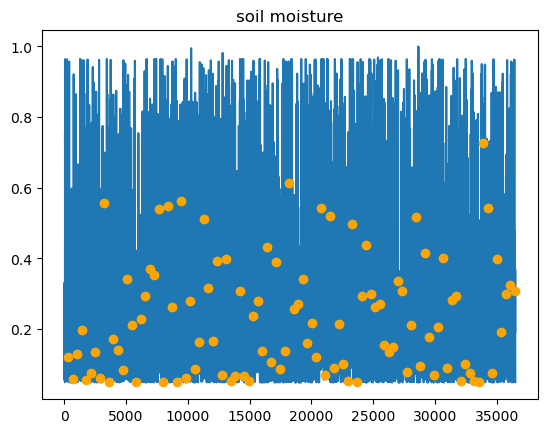

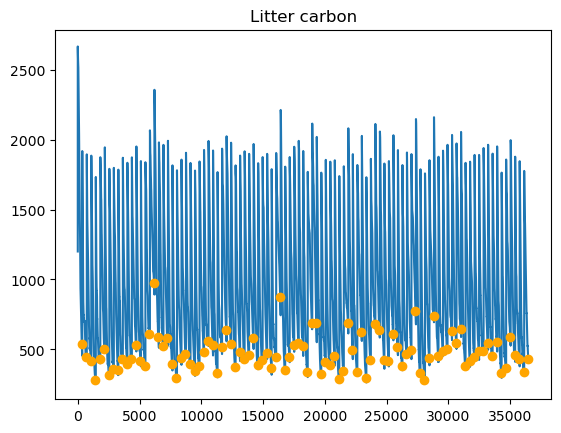

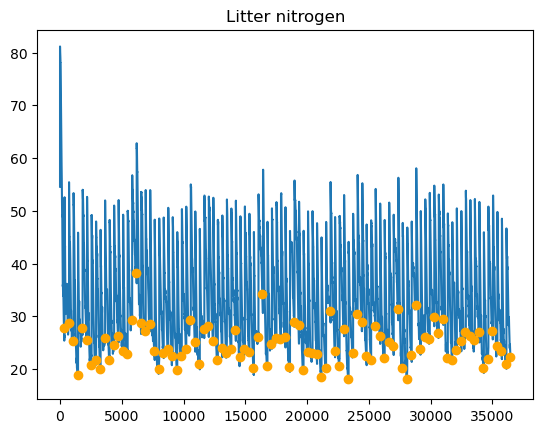

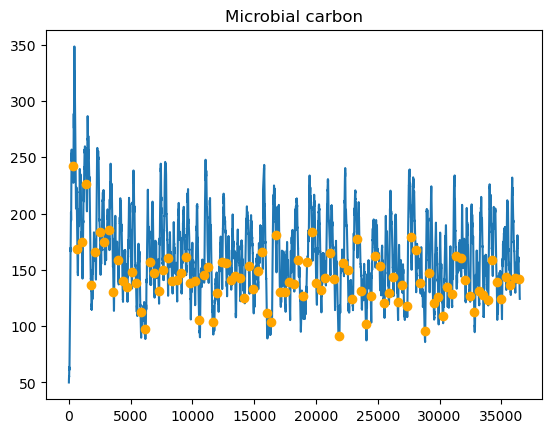

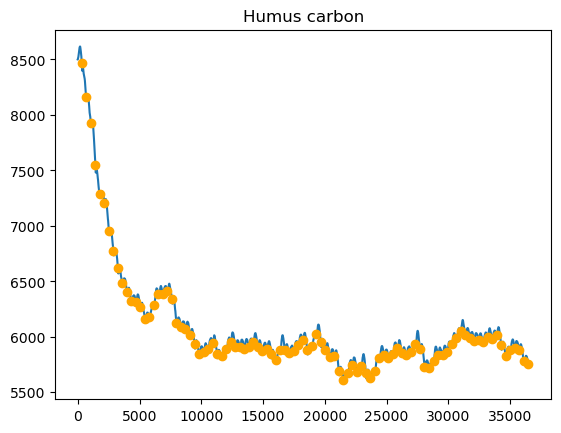

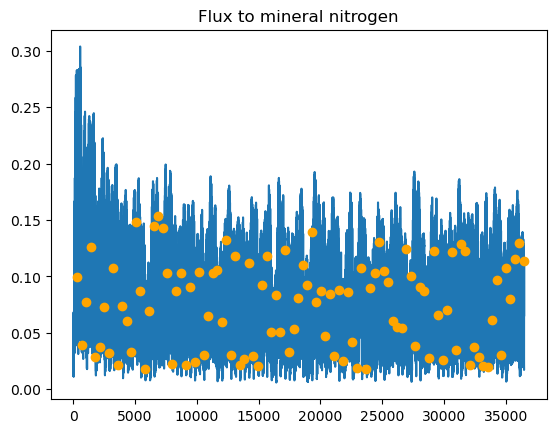

In [4]:
planting_days = np.linspace(365 - 40, TRANSIENT_PERIOD_DAYS - 40, int(TRANSIENT_PERIOD_DAYS / 365), dtype=np.uint16)
plt.plot(range(TRANSIENT_PERIOD_DAYS), soil_moisture)
plt.scatter(planting_days, soil_moisture[365-40::365], color="orange", zorder=100)
plt.title("soil moisture")
plt.figure()
plt.plot(range(TRANSIENT_PERIOD_DAYS), litter_carbon_gC_per_m3)
plt.scatter(planting_days, litter_carbon_gC_per_m3[365-40::365], color="orange", zorder=100)
plt.title("Litter carbon")
plt.figure()
plt.plot(range(TRANSIENT_PERIOD_DAYS), litter_nitrogen_gN_per_m3)
plt.scatter(planting_days, litter_nitrogen_gN_per_m3[365-40::365], color="orange", zorder=100)
plt.title("Litter nitrogen")
plt.figure()
plt.plot(range(TRANSIENT_PERIOD_DAYS), microbial_carbon_gC_per_m3)
plt.scatter(planting_days, microbial_carbon_gC_per_m3[365-40::365], color="orange", zorder=100)
plt.title("Microbial carbon")
plt.figure()
plt.plot(range(TRANSIENT_PERIOD_DAYS), humus_carbon_gC_per_m3)
plt.scatter(planting_days, humus_carbon_gC_per_m3[365-40::365], color="orange", zorder=100)
plt.title("Humus carbon")
plt.figure()
plt.plot(range(TRANSIENT_PERIOD_DAYS), net_flux_to_mineral_nitrogen_gN_per_m3_per_day)
plt.scatter(planting_days, net_flux_to_mineral_nitrogen_gN_per_m3_per_day[365-40::365], color="orange", zorder=100)
plt.title("Flux to mineral nitrogen")

Text(0.5, 1.0, 'Flux to mineral nitrogen')

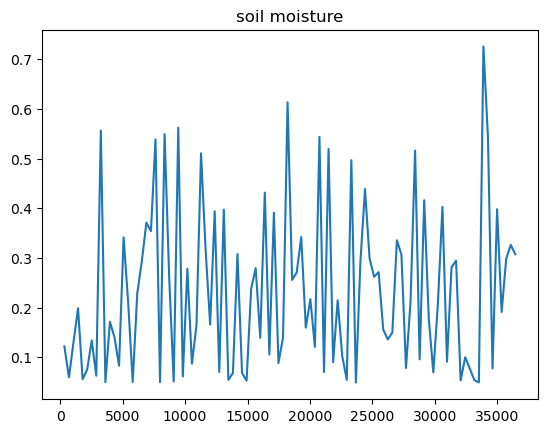

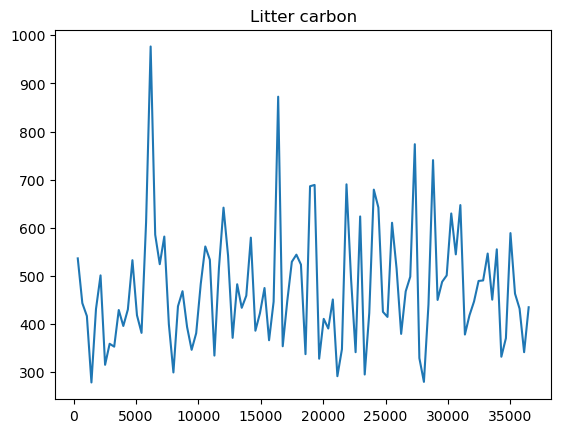

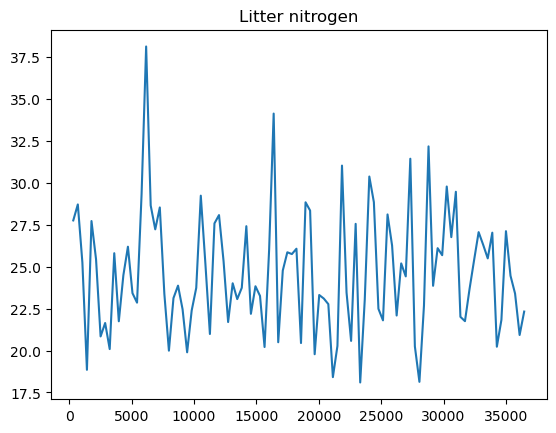

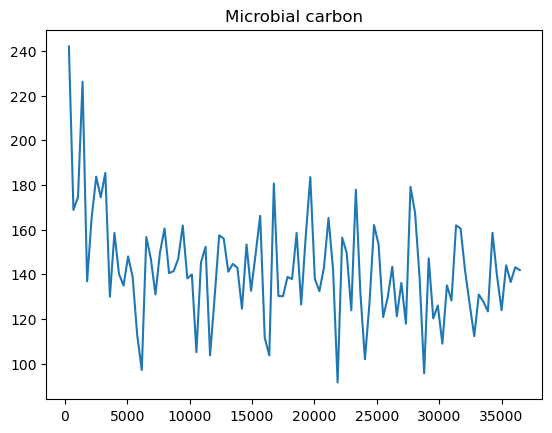

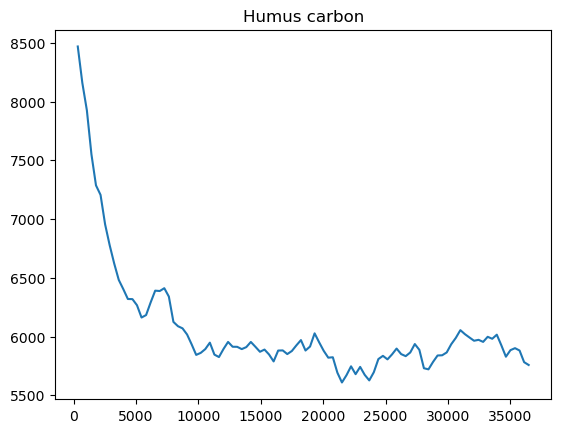

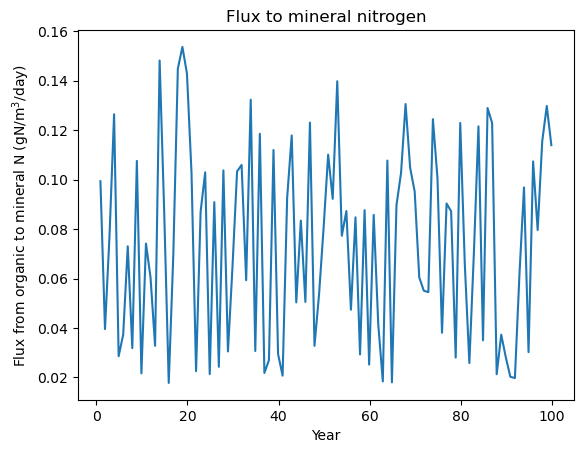

In [12]:
planting_days = np.linspace(365 - 40, TRANSIENT_PERIOD_DAYS - 40, int(TRANSIENT_PERIOD_DAYS / 365), dtype=np.uint16)
plt.plot(planting_days, soil_moisture[365-40::365])
plt.title("soil moisture")
plt.figure()
plt.plot(planting_days, litter_carbon_gC_per_m3[365-40::365])
plt.title("Litter carbon")
plt.figure()
plt.plot(planting_days, litter_nitrogen_gN_per_m3[365-40::365])
plt.title("Litter nitrogen")
plt.figure()
plt.plot(planting_days, microbial_carbon_gC_per_m3[365-40::365])
plt.title("Microbial carbon")
plt.figure()
plt.plot(planting_days, humus_carbon_gC_per_m3[365-40::365])
plt.title("Humus carbon")
plt.figure()
plt.plot(planting_days / 365.0, net_flux_to_mineral_nitrogen_gN_per_m3_per_day[365-40::365])
plt.xlabel("Year")
plt.ylabel("Flux from organic to mineral N (gN/$\\text{m}^3$/day)")
plt.title("Flux to mineral nitrogen")

In [6]:
np.sum(net_flux_to_mineral_nitrogen_gN_per_m3_per_day[-365:-40])

np.float64(22.91462475745365)

In [7]:
initial_moistures = np.linspace(0.0, 1.0, 100)
resulting_moistures = np.ndarray(initial_moistures.shape)
leakages = np.ndarray(initial_moistures.shape)
for i in range(len(initial_moistures)):
    out = hydrology_model(initial_moistures[i], np.array([0.0, 0.0]))
    resulting_moistures[i] = out[0][1]
    leakages[i] = out[4][0]

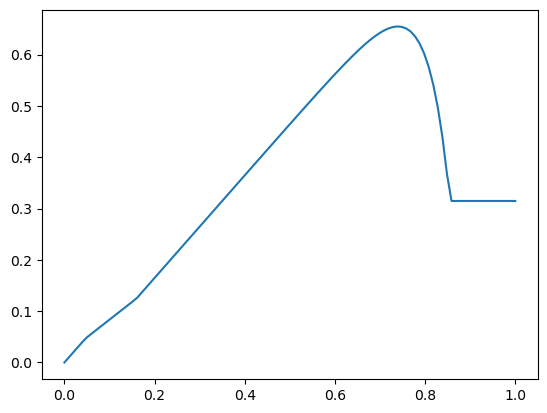

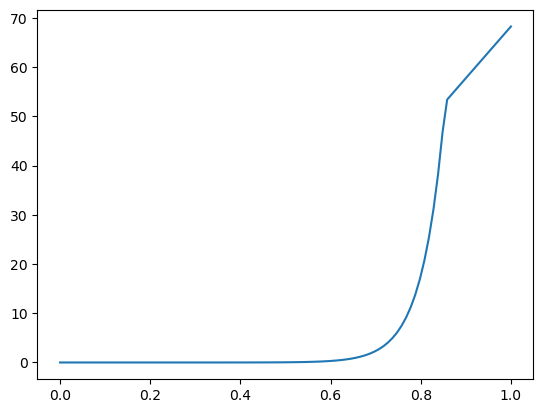

In [8]:
plt.plot(initial_moistures, resulting_moistures)
plt.figure()
plt.plot(initial_moistures, leakages)

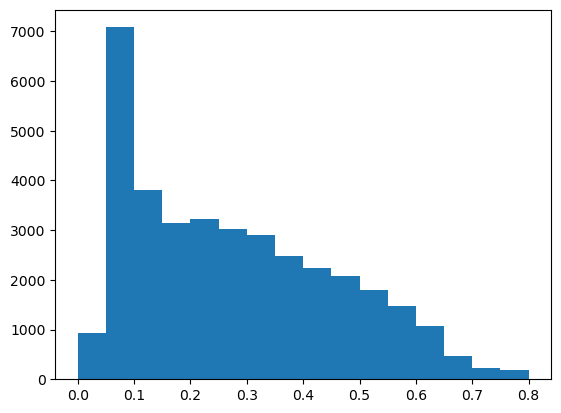

In [9]:
MAX_MOISTURE = 0.8
MOISTURE_GRID_SIZE = 0.05
bins = np.arange(0, MAX_MOISTURE + MOISTURE_GRID_SIZE, MOISTURE_GRID_SIZE)
moisture_counts, _, _ = plt.hist(soil_moisture, bins=bins)

In [10]:
bins

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 ])

In [11]:
non_leaky_moisture_counts = moisture_counts[:int(FIELD_CAPACITY / MOISTURE_GRID_SIZE)]
non_leaky_moisture_counts / np.sum(non_leaky_moisture_counts)

array([0.04372615, 0.3337417 , 0.17956934, 0.14861235, 0.15219338,
       0.14215709])